<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="110" /></p>

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Upgrading Libraries**](#Section32)<br>
  3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
9. [**Summarization**](#Section9)</br>
  9.1 [**Conclusion**](#Section91)</br>
  9.2 [**Actionable Insights**](#Section91)</br>

---

---
<a name = Section1></a>
# **1. Introduction**
---
The Premier League is the top professional football league in England, comprising 20 clubs that compete against each other in a round-robin tournament. Each club plays a total of 38 matches in a season, with each team facing every other team twice, once at their home stadium and once at the opponent's stadium.

The Premier League, as the most-watched sports league globally, has a vast reach, captivating millions of viewers across the globe. With its extensive broadcast coverage in 212 territories, reaching 643 million homes and potentially attracting a TV audience of 4.7 billion people, there is a pressing need to enhance the capabilities of players and teams through concrete and precise analysis of past plays.

HomeTeam and AwayTeam are columns in the provided CSV file that likely represent the names of the teams playing in each match. These columns indicate whether a particular match is being played at the home stadium of the HomeTeam or the away stadium of the AwayTeam.


---
<a name = Section2></a>
# **2. Problem Statement**
---
The Premier League is seeking to leverage the rich data available in the provided columns - Div, Date, HomeTeam, AwayTeam, FTHG, FTAG, FTR, HTHG, HTAG, HTR, and Season - to address a key challenge and enhance various aspects of the league.

  
<p align="center"><img src="https://upload.wikimedia.org/wikipedia/en/thumb/f/f2/Premier_League_Logo.svg/1200px-Premier_League_Logo.svg.png" style="width:200px;"></p>


The goal is 
 - to leverage the available data to tackle specific problem areas and improve different aspects of the league's operations.
 - to identify key factors that contribute to success, uncover player strengths and weaknesses, highlight tactical nuances, and provide actionable recommendations to players, teams, and coaching staff
 - to make data-informed decisions, refine their skills, optimize their strategies, and ultimately elevate the level of play across the league
 - to devise targeted training programs, optimize tactics, and identify potential areas for improvement.
 
By embracing the power of data science and leveraging historical match data, the Premier League can unlock new avenues for growth, enhance player capabilities, and further solidify its position as the pinnacle of football excellence.


---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---

- Installing and importing the necessary libraries as required.

### **Installing Libraries**

In [1]:
!pip install pandas      # Importing package pandas (For data manipulation and analysis in Python)
!pip install numpy       # Importing package numpys (For Numerical Python)

In [2]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.3.2 requires numpy<1.24,>=1.16.0, but you have numpy 1.24.3 which is incompatible.
ydata-profiling 4.3.2 requires visions[type_image_path]==0.7.5, but you have visions 0.7.4 which is incompatible.


### **Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell under Installing Libraries and Upgrading Libraries again after restarting the runtime.

In [3]:
!pip install -U ydata-profiling
!pip install -q --upgrade pandas-profiling

  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.5 which is incompatible.
ERROR: pip's dependency resolver does not currently take into acc

### **Importing Libraries**

- You can headstart with the basic libraries as imported inside the cell below.

- If you want to import some additional libraries, feel free to do so.


In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing for panel data analysis
import pandas as pd                                                 # Importing for panel data analysis

from sklearn.preprocessing import LabelEncoder                      # For Encoding Categorical Data                            
from pandas_profiling import ProfileReport                       # To perform data profiling
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
from collections import Counter                                     # For counting hashable objects
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import plotly.graph_objs as go                                      # For Plotly interfaced graphs
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
from matplotlib.patheffects import PathPatchEffect, SimpleLineShadow, Normal

/home/mithilesh/anaconda3/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/home/mithilesh/anaconda3/lib/python3.11/site-packages/visions/backends/shared/nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit
/tmp/ipykernel_56033/3942340787.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_pr

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

To address the challenge at hand and enable concrete and precise analysis of past plays in the Premier League, the following fields need to be acquired and described:

It describes the attitudes towards League and frequency of matches and goals in the tech workplace.
| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 9664 | 11 | 830.6+ KB| 


|Id|Feature|Description|
|:--|:--|:--|
|01|Div| The division the match was played in.| 
|02|Date| The date the match was played.| 
|03|HomeTeam| The name of the home team.| 
|04|AwayTeam| The name of the away team.|
|05|FTHG| The total number of goals scored by the home team during the match at full time.|
|06| FTAG| The total number of goals scored by the away team during the match at full time.|
|07|FTR| The full time result ('H' for home team win, 'A' for away team win, or 'D' for draw).|
|08|HTHG| The total number of goals scored by the home team at half time.|
|09|HTAG| The total number of goals scored by the away team at half time.|
|10|HTR| The half time result ('H' for home team advantage, 'A' for away team advantage, or 'D' for draw).|
|11|Season| The season in which the match was played.|


In [2]:
data = pd.read_csv(filepath_or_buffer = 'premier_league.csv')
print('Data Shape:', data.shape)
data.tail(10)

Data Shape: (9664, 11)


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
9654,E0,13/05/18,Burnley,Bournemouth,1,2,A,1.00000,0.00000,H,2017-18
9655,E0,13/05/18,Crystal Palace,West Brom,2,0,H,0.00000,0.00000,D,2017-18
9656,E0,13/05/18,Huddersfield,Arsenal,0,1,A,0.00000,1.00000,A,2017-18
9657,E0,13/05/18,Liverpool,Brighton,4,0,H,2.00000,0.00000,H,2017-18
9658,E0,13/05/18,Man United,Watford,1,0,H,1.00000,0.00000,H,2017-18
9659,E0,13/05/18,Newcastle,Chelsea,3,0,H,1.00000,0.00000,H,2017-18
9660,E0,13/05/18,Southampton,Man City,0,1,A,0.00000,0.00000,D,2017-18
9661,E0,13/05/18,Swansea,Stoke,1,2,A,1.00000,2.00000,A,2017-18
9662,E0,13/05/18,Tottenham,Leicester,5,4,H,1.00000,2.00000,A,2017-18
9663,E0,13/05/18,West Ham,Everton,3,1,H,1.00000,0.00000,H,2017-18


### **Data Description**

- To get some quick description out of the data we can use describe method defined in pandas library.

In [3]:
data.describe()

,FTHG,FTAG,HTHG,HTAG
count,9664.00000,9664.00000,8740.00000,8740.00000
mean,1.52390,1.12148,0.68547,0.48844
std,1.30167,1.12167,0.83358,0.71052
min,0.00000,0.00000,0.00000,0.00000
25%,1.00000,0.00000,0.00000,0.00000
50%,1.00000,1.00000,0.00000,0.00000
75%,2.00000,2.00000,1.00000,1.00000
max,9.00000,8.00000,5.00000,5.00000


### **Data Information**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       9664 non-null   object 
 1   Date      9664 non-null   object 
 2   HomeTeam  9664 non-null   object 
 3   AwayTeam  9664 non-null   object 
 4   FTHG      9664 non-null   int64  
 5   FTAG      9664 non-null   int64  
 6   FTR       9664 non-null   object 
 7   HTHG      8740 non-null   float64
 8   HTAG      8740 non-null   float64
 9   HTR       8740 non-null   object 
 10  Season    9664 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 830.6+ KB


In [5]:
data.isna().sum()

Div           0
Date          0
HomeTeam      0
AwayTeam      0
FTHG          0
FTAG          0
FTR           0
HTHG        924
HTAG        924
HTR         924
Season        0
dtype: int64

In [6]:
data['HTR'].unique()   

array([nan, 'H', 'D', 'A'], dtype=object)

In [7]:
data['HTR'].value_counts()

D    3679
H    3086
A    1975
Name: HTR, dtype: int64

In [8]:
data['HTHG'].unique()

array([nan,  3.,  1.,  0.,  2.,  5.,  4.])

In [9]:
data['HTHG'].value_counts()

0.00000    4428
1.00000    2982
2.00000    1039
3.00000     241
4.00000      42
5.00000       8
Name: HTHG, dtype: int64

In [10]:
data['HTAG'].unique()

array([nan,  0.,  1.,  3.,  2.,  4.,  5.])

In [11]:
data['HTAG'].value_counts()

0.00000    5405
1.00000    2559
2.00000     639
3.00000     117
4.00000      19
5.00000       1
Name: HTAG, dtype: int64

In [12]:
data.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Season'],
      dtype='object')

---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

- This section is emphasised on getting a report about the data.

- You need to perform pandas profiling and get some observations out of it...

In [13]:
profile = ProfileReport(df=data)
profile.to_file(output_file='mithilesh_preprofile.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


In [14]:
clean_data = data.copy()

<a name = Section6></a>
# **6. Data Pre-Processing**
---

- This section is emphasised on performing data manipulation over unstructured data for further processing and analysis.

- To modify unstructured data to strucuted data you need to verify and manipulate the integrity of the data by:
 

**Handling missing data**
----------------------------------------
##### Observations:
           - if we don't want to effect the final Result (FTR) we must go with min values.
             - HTHG must go with min(0)
             - HTAG also min(0)
             - So both team has equal values we can declare its Draw 
                - put D in HTR column
    
  

In [15]:
# Cleaning Data
# ---------------------------------
# HTHG  - Half Time HomeTeam Goal
# HTAG  - Half Time AwayTeam Goal
# HTR   - Half Time Result (A - AwayTeam win, H-HomeTeam Win, D-Draw)

# So after checking data 
# if we don't want to effect final Result (FTR)
# HTHG must go with min(0) and HTAG also min(0) so that we can use D-Draw in HTR 
# 

clean_data['HTHG'] = clean_data['HTHG'].fillna(value=clean_data['HTHG'].min()) 
clean_data['HTAG'] = clean_data['HTAG'].fillna(value=clean_data['HTAG'].min())
clean_data['HTR'] = clean_data['HTR'].fillna(value='D')


In [16]:
clean_data.head(5)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,E0,14/08/93,Arsenal,Coventry,0,3,A,0.00000,0.00000,D,1993-94
1,E0,14/08/93,Aston Villa,QPR,4,1,H,0.00000,0.00000,D,1993-94
2,E0,14/08/93,Chelsea,Blackburn,1,2,A,0.00000,0.00000,D,1993-94
3,E0,14/08/93,Liverpool,Sheffield Weds,2,0,H,0.00000,0.00000,D,1993-94
4,E0,14/08/93,Man City,Leeds,1,1,D,0.00000,0.00000,D,1993-94


**Handling redundant data**
----------------------------------------------
##### Observation :
    - we observe there is no duplicate data

In [17]:
print('Contains Duplicate Rows?', clean_data.duplicated().any())

Contains Duplicate Rows? False


**Handling inconsistent data**
--------------------------------------------
##### Observation :
         - Date : is inappropriate data ie: object which we need to convert to datetime format
         - HTHG and HTAG both are float, the goal value must go with integer type.
         So we will take action on these fields.


In [18]:
# Transforming Dat's object type to datetime
clean_data['Date'] = pd.to_datetime(data['Date'])

# Transforming HTHG float to int
clean_data['HTHG'] = clean_data['HTHG'].astype(int)

# Transforming HTAG float to int
clean_data['HTAG'] = clean_data['HTAG'].astype(int)

clean_data.tail(5)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
9659,E0,2018-05-13,Newcastle,Chelsea,3,0,H,1,0,H,2017-18
9660,E0,2018-05-13,Southampton,Man City,0,1,A,0,0,D,2017-18
9661,E0,2018-05-13,Swansea,Stoke,1,2,A,1,2,A,2017-18
9662,E0,2018-05-13,Tottenham,Leicester,5,4,H,1,2,A,2017-18
9663,E0,2018-05-13,West Ham,Everton,3,1,H,1,0,H,2017-18


**Handling outliers**
------------------------------
##### Observation : 
     - No outlier

In [19]:
clean_data.describe()

,FTHG,FTAG,HTHG,HTAG
count,9664.00000,9664.00000,9664.00000,9664.00000
mean,1.52390,1.12148,0.61993,0.44174
std,1.30167,1.12167,0.81795,0.69080
min,0.00000,0.00000,0.00000,0.00000
25%,1.00000,0.00000,0.00000,0.00000
50%,1.00000,1.00000,0.00000,0.00000
75%,2.00000,2.00000,1.00000,1.00000
max,9.00000,8.00000,5.00000,5.00000


**Handling typos**
-----------------------------
##### Observation :
 - By finding the actual name on primier leage websites, found some mistakes the name we have clean by original name.

In [20]:
clean_data['HomeTeam'] = clean_data['HomeTeam'].str.replace('Man City','Manchester C')
clean_data['AwayTeam'] = clean_data['AwayTeam'].str.replace('Man City','Manchester C')
clean_data['HomeTeam'] = clean_data['HomeTeam'].str.replace('Leeds','Leeds Utd')
clean_data['AwayTeam'] = clean_data['AwayTeam'].str.replace('Leeds','Leeds Utd')
clean_data['HomeTeam'] = clean_data['HomeTeam'].str.replace('Man United','Manchester Utd')
clean_data['AwayTeam'] = clean_data['AwayTeam'].str.replace('Man United','Manchester Utd')
clean_data['HomeTeam'] = clean_data['HomeTeam'].str.replace("Nott'm Forest",'Nottingham forest')
clean_data['AwayTeam'] = clean_data['AwayTeam'].str.replace("Nott'm Forest",'Nottingham forest')

# getting unique value 
for x in clean_data.columns:
    print("Unique value in ("+x+") Size("+str(clean_data[x].unique().size)+") :\n")
    print(clean_data[x].unique())
    print("\n")


Unique value in (Div) Size(1) :

['E0']


Unique value in (Date) Size(2572) :

['1993-08-14T00:00:00.000000000' '1993-08-15T00:00:00.000000000'
 '1993-08-16T00:00:00.000000000' ... '2018-09-05T00:00:00.000000000'
 '2018-10-05T00:00:00.000000000' '2018-05-13T00:00:00.000000000']


Unique value in (HomeTeam) Size(50) :

['Arsenal' 'Aston Villa' 'Chelsea' 'Liverpool' 'Manchester C' 'Newcastle'
 'Oldham' 'Sheffield United' 'Southampton' 'West Ham' 'Norwich'
 'Tottenham' 'Everton' 'Ipswich' 'Leeds Utd' 'Wimbledon' 'Blackburn'
 'Coventry' 'Manchester Utd' 'QPR' 'Sheffield Weds' 'Swindon'
 'Crystal Palace' 'Leicester' 'Nottingham forest' 'Bolton' 'Middlesbrough'
 'Derby' 'Sunderland' 'Barnsley' 'Charlton' 'Watford' 'Bradford' 'Fulham'
 'Birmingham' 'Middlesboro' 'West Brom' 'Portsmouth' 'Wolves' 'Wigan'
 'Reading' 'Hull' 'Stoke' 'Burnley' 'Blackpool' 'Swansea' 'Cardiff'
 'Bournemouth' 'Brighton' 'Huddersfield']


Unique value in (AwayTeam) Size(50) :

['Coventry' 'QPR' 'Blackburn' 'Sheffield 

---
<a name = Section7></a>
# **7. Data Post-Profiling**
---

- This section is emphasised on getting a report about the data after the data manipulation.

- You may end up observing some new changes, so keep it under check and make right observations.

In [21]:
profile = ProfileReport(df=clean_data,minimal=True)
profile.to_file(output_file='Post Profiling Report.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---


In [22]:
clean_data['FTR'].value_counts()

H    4461
A    2657
D    2546
Name: FTR, dtype: int64

#### Report 1 : Final Match Outcome
    

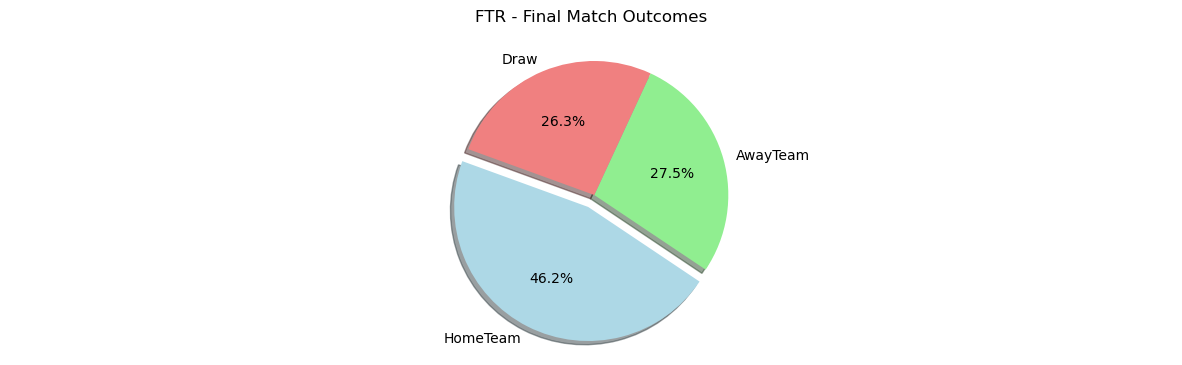

In [23]:
# Initialize figure of size 15 X 7
fig = plt.figure(figsize=(15,4))

labels = ['HomeTeam', 'AwayTeam', 'Draw']
values = clean_data['FTR'].value_counts()
colors = ['lightblue', 'lightgreen', 'lightcoral']
explode = (0.1, 0, 0)  # To explode the first slice (HomeTeam)

plt.pie(values, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=160)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.title('FTR - Final Match Outcomes\n')
plt.savefig("pieoutput")
plt.show()



#### Report 2: Season Wise Final Result Goals HomeTeam vs AwayTeam

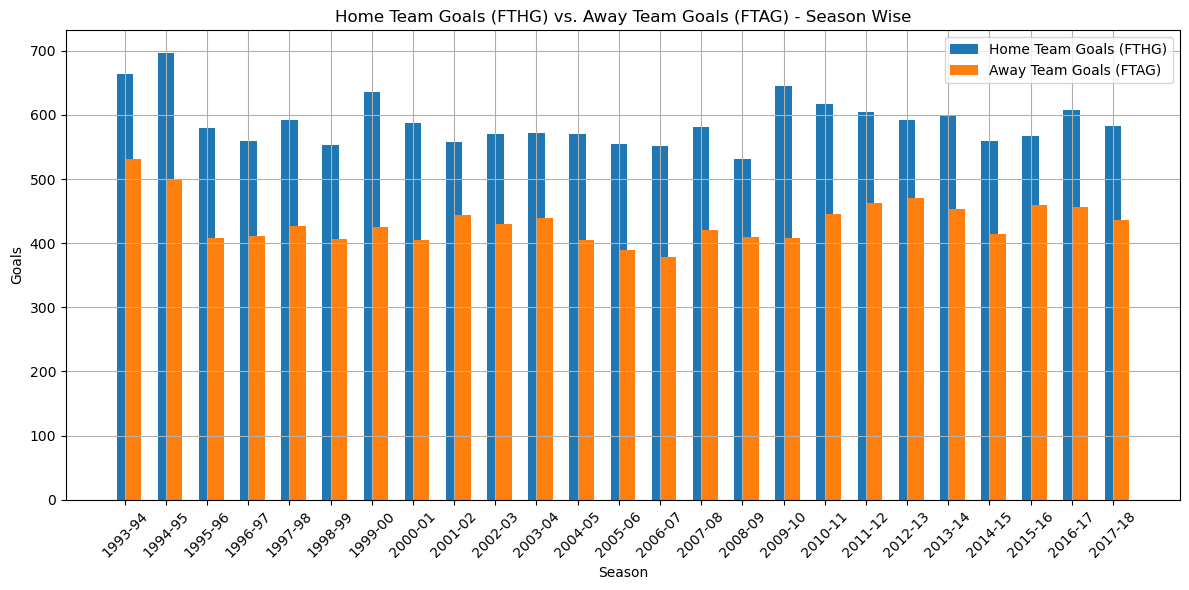

In [24]:
# To calculate the Season Wise Goals Query as follows

seasonWiseGoal = clean_data.groupby('Season').agg({
    'FTHG': 'sum',
    'FTAG': 'sum'
}).reset_index()

align = ['center','edge']
label = ['Home Team Goals (FTHG)','Away Team Goals (FTAG)']

#create chart
plt.figure(figsize=(12, 6))
plt.bar(seasonWiseGoal['Season'],seasonWiseGoal['FTHG'], width=0.4, align=align[0], label=label[0],path_effects=
[SimpleLineShadow(), Normal()])
plt.bar(seasonWiseGoal['Season'],seasonWiseGoal['FTAG'], width=0.4, align=align[1], label=label[1],path_effects=
[SimpleLineShadow(), Normal()])

# Customize the plot
plt.xlabel('Season')
plt.ylabel('Goals')
plt.title('Home Team Goals (FTHG) vs. Away Team Goals (FTAG) - Season Wise')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.savefig("hometeamvsawayteam")
plt.show()

##### Report 3: Season Wise half Time Goals HomeTeam and AwayTeam

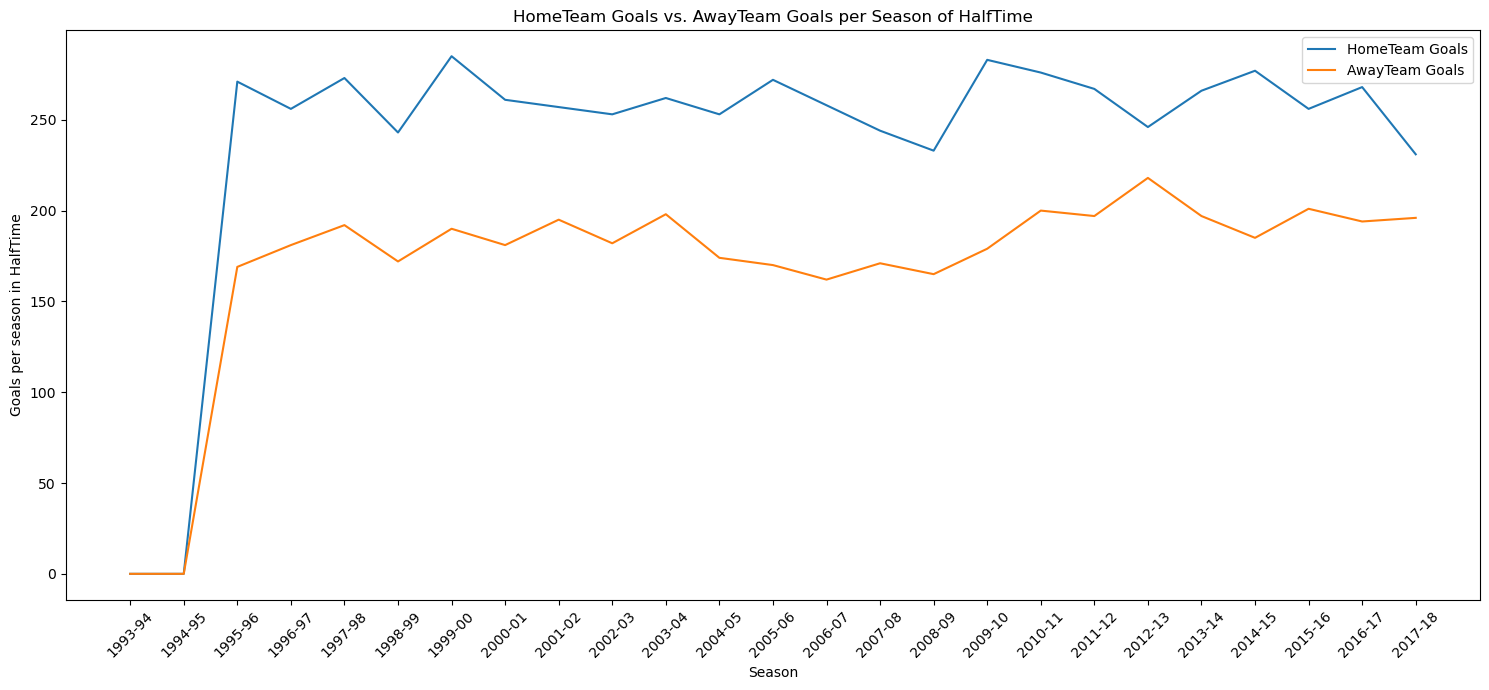

In [25]:
# To calculate the Season Wise Goals Query as follows
figure, ax = plt.subplots(figsize=(15, 7))
dt = clean_data.groupby(by=['Season'])[['HTHG', 'HTAG']].sum()
sns.lineplot(x='Season', y='HTHG', data=dt, ax=ax, label='HomeTeam Goals')
sns.lineplot(x='Season', y='HTAG', data=dt, ax=ax, label='AwayTeam Goals')
plt.xticks(rotation=45)
plt.xlabel('Season')
plt.ylabel('Goals per season in HalfTime')
plt.title('HomeTeam Goals vs. AwayTeam Goals per Season of HalfTime')
plt.legend()
plt.tight_layout()
plt.savefig("halftimegoal")
plt.show()

##### Report 4: Average Goal Per Team

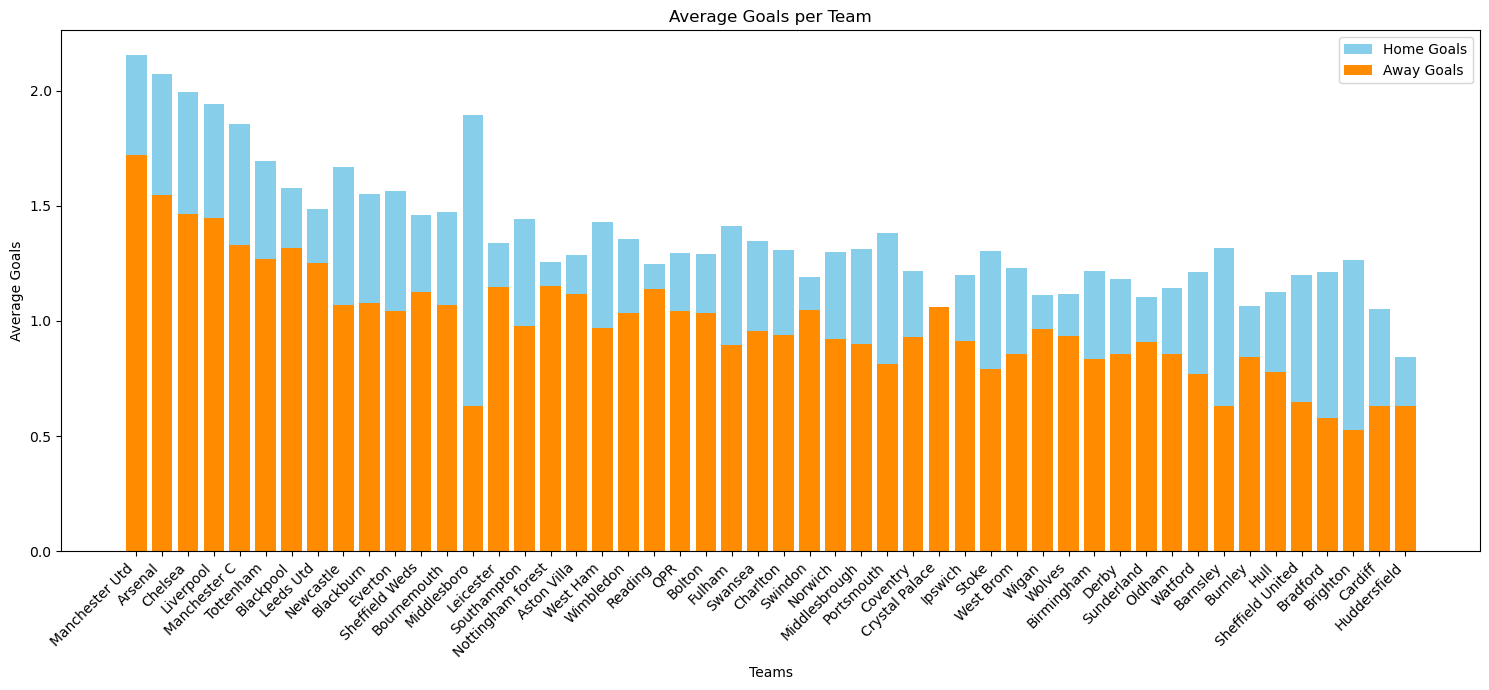

In [26]:
# Calculate average goals scored at home for each team
home_team_avg_goals = clean_data.groupby('HomeTeam')['FTHG'].mean()

# Calculate average goals scored away for each team
away_team_avg_goals = clean_data.groupby('AwayTeam')['FTAG'].mean()

# Combine both average goals into a single DataFrame
team_avg_goals = pd.DataFrame({
    'HomeTeam': home_team_avg_goals.index,
    'HomeTeamAvgGoals': home_team_avg_goals.values,
    'AwayTeam': away_team_avg_goals.index,
    'AwayTeamAvgGoals': away_team_avg_goals.values
})

team_avg_goals['OverallAvgGoals'] = (team_avg_goals['HomeTeamAvgGoals'] + team_avg_goals['AwayTeamAvgGoals']) / 2
team_avg_goals_sorted = team_avg_goals.sort_values(by='OverallAvgGoals', ascending=False)

# Create the bar plot with sorted data
plt.figure(figsize=(15, 7))
plt.bar(team_avg_goals_sorted['HomeTeam'], team_avg_goals_sorted['HomeTeamAvgGoals'], color='skyblue', label='Home Goals')
plt.bar(team_avg_goals_sorted['AwayTeam'], team_avg_goals_sorted['AwayTeamAvgGoals'], color='darkorange', label='Away Goals')
plt.xlabel('Teams')
plt.ylabel('Average Goals')
plt.title('Average Goals per Team')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.savefig("avggoalperteam")
plt.show()

##### Report 5: Total Goal As per Season

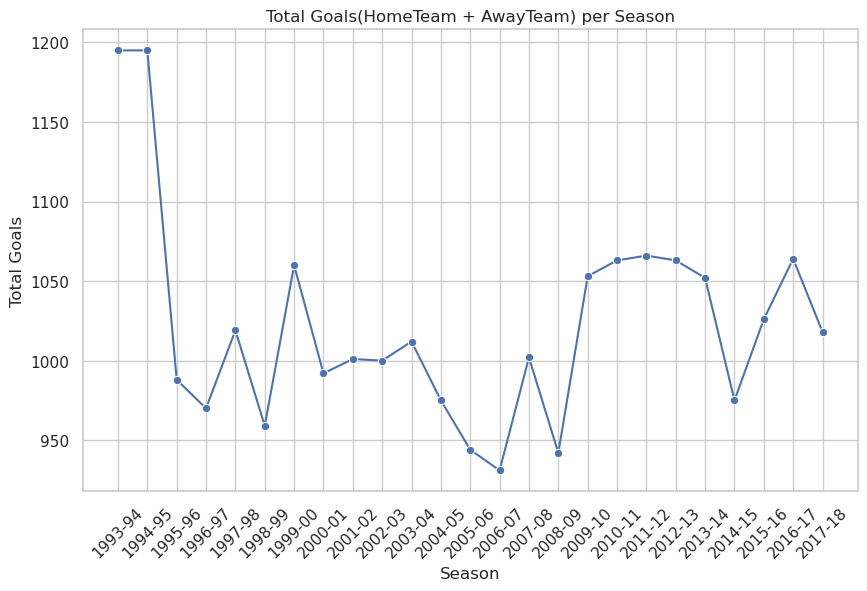

In [27]:
fullResult = clean_data.groupby(by=['Season'])['FTHG','FTAG'].sum().reset_index()

rdata = []
for index, row in fullResult.iterrows():
    season = row['Season']
    fthg_sum = row['FTHG']
    ftag_sum = row['FTAG']
    local = []
    local.append(season)
    local.append(fthg_sum+ftag_sum)
    rdata.append(local)

# Create the pandas DataFrame
TotalGoals = pd.DataFrame(rdata, columns=['Season', 'TotalGoals'])

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=TotalGoals, x='Season', y='TotalGoals', marker='o')
plt.xticks(rotation=45)
plt.title('Total Goals(HomeTeam + AwayTeam) per Season')
plt.xlabel('Season')
plt.ylabel('Total Goals')
plt.savefig("TotalGoalsperSeason")
plt.show()

##### Report 6: Half-Time Result Distribution

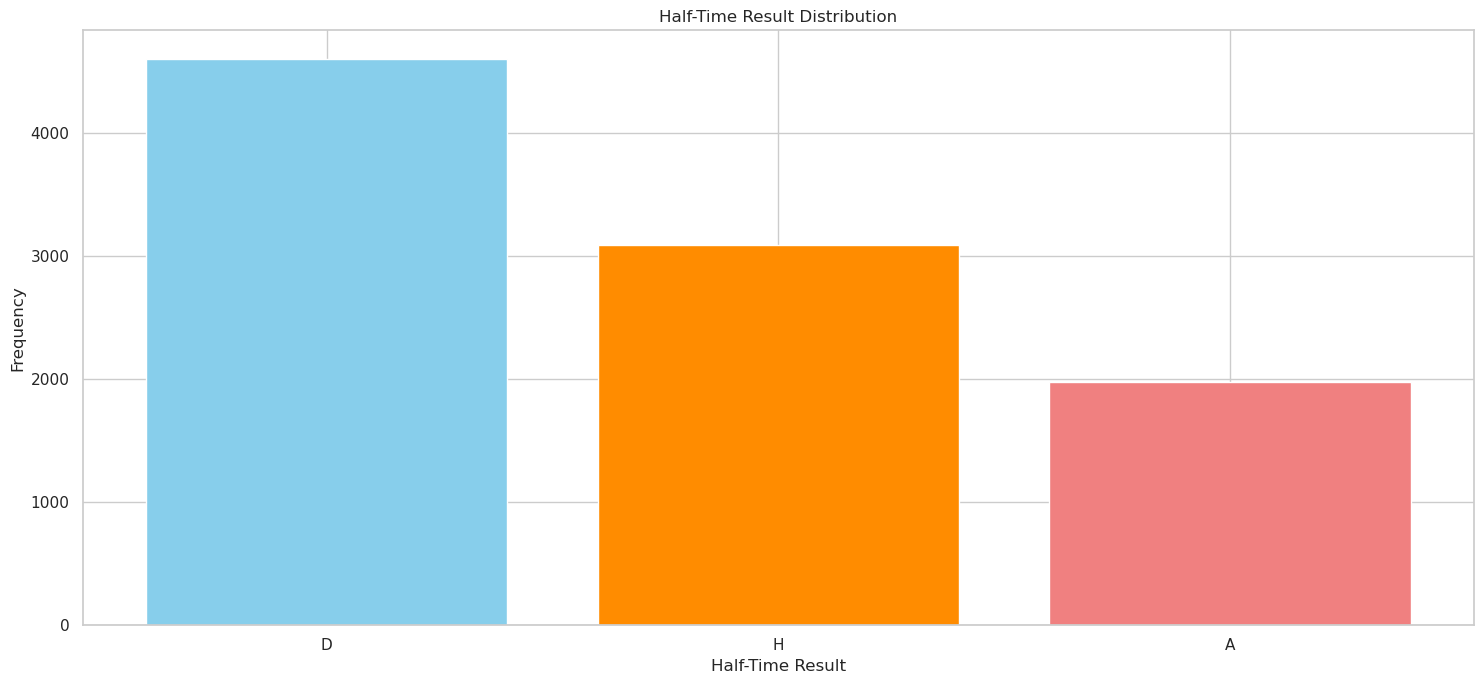

In [28]:
figure, ax = plt.subplots(figsize=(15, 7))
htr_counts = clean_data['HTR'].value_counts()
plt.bar(htr_counts.index, htr_counts.values, color=['skyblue', 'darkorange', 'lightcoral'])
plt.xlabel('Half-Time Result')
plt.ylabel('Frequency')
plt.title('Half-Time Result Distribution')
plt.tight_layout()
plt.savefig("halftimedistribution")
plt.show()

##### Report 7:  HomeTeam Goals vs. AwayTeam Goals in terms of total Goals

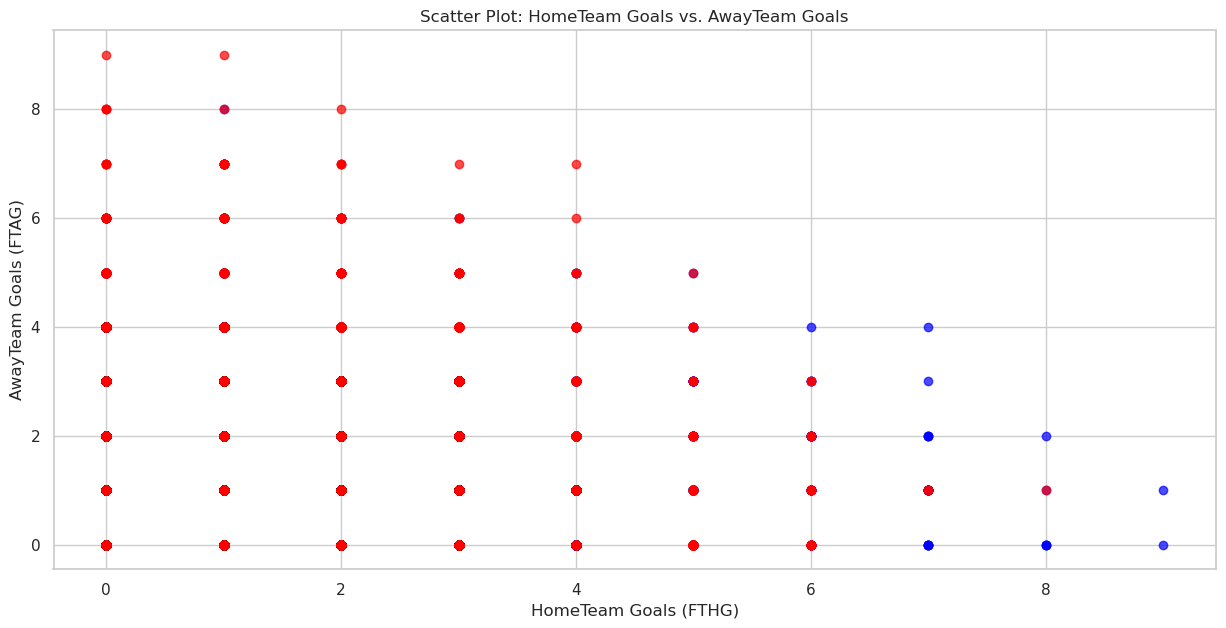

In [29]:

plt.figure(figsize=(15, 7))
plt.scatter(clean_data['FTHG'], clean_data['FTAG'], color='blue', alpha=0.7, label='HomeTeam Goals (FTHG)')
plt.scatter(clean_data['FTAG'], clean_data['FTHG'], color='red', alpha=0.7, label='AwayTeam Goals (FTAG)')
plt.xlabel('HomeTeam Goals (FTHG)')
plt.ylabel('AwayTeam Goals (FTAG)')
plt.title('Scatter Plot: HomeTeam Goals vs. AwayTeam Goals')
plt.grid(True)
plt.savefig("goalasperbothteam")
plt.show()


##### Report 8: Team Win and Draw 

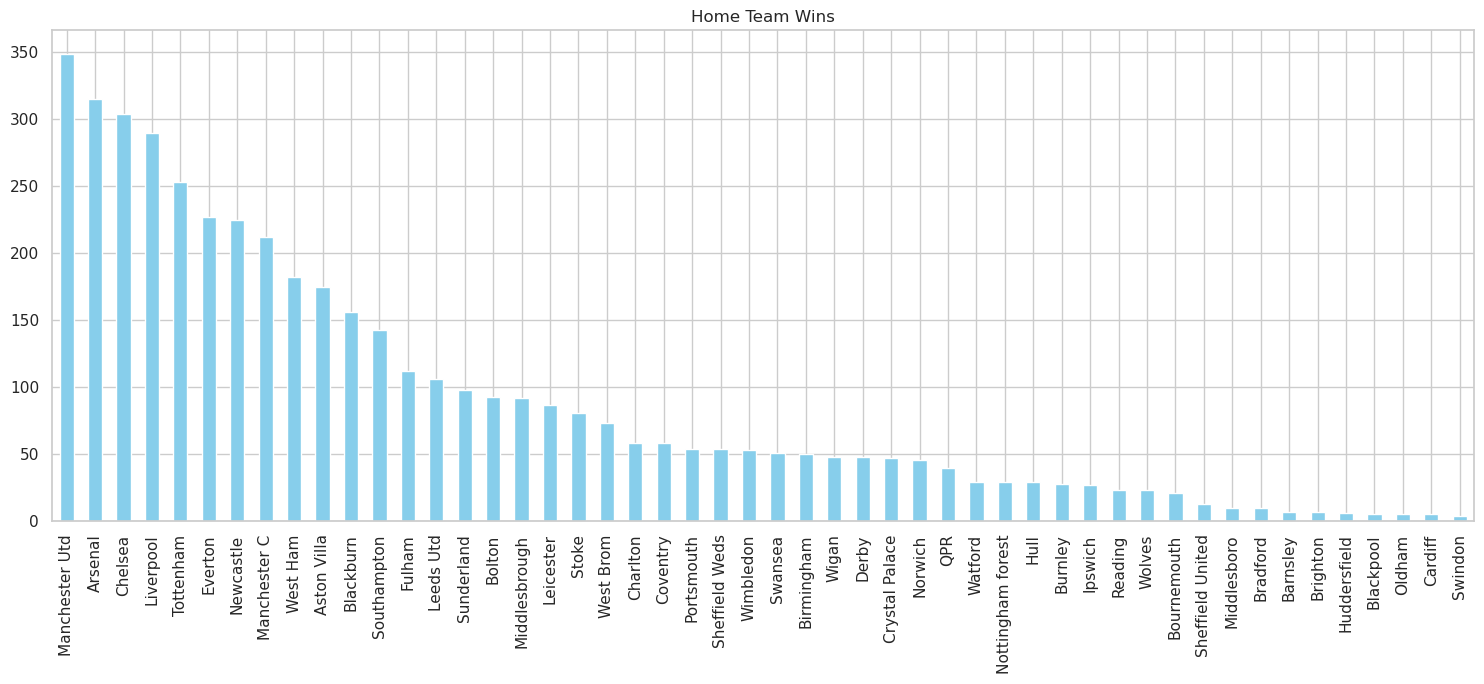

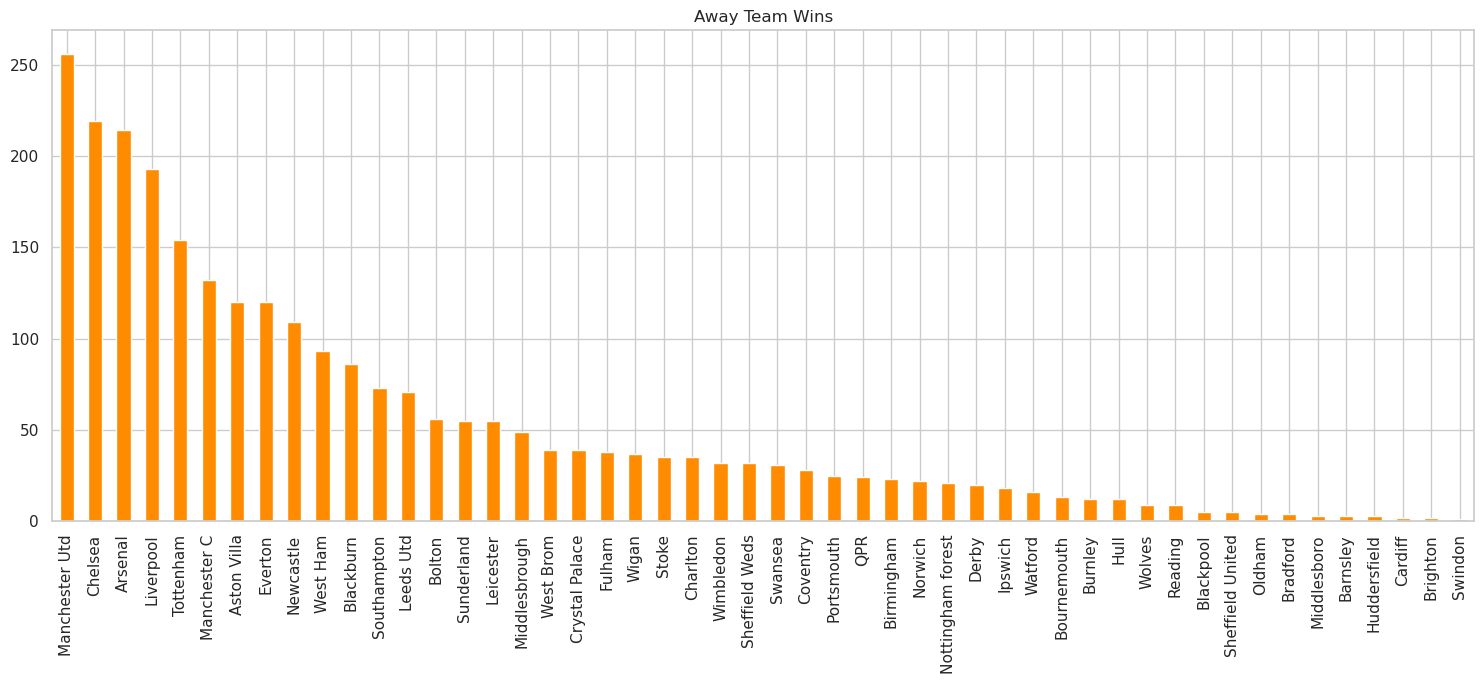

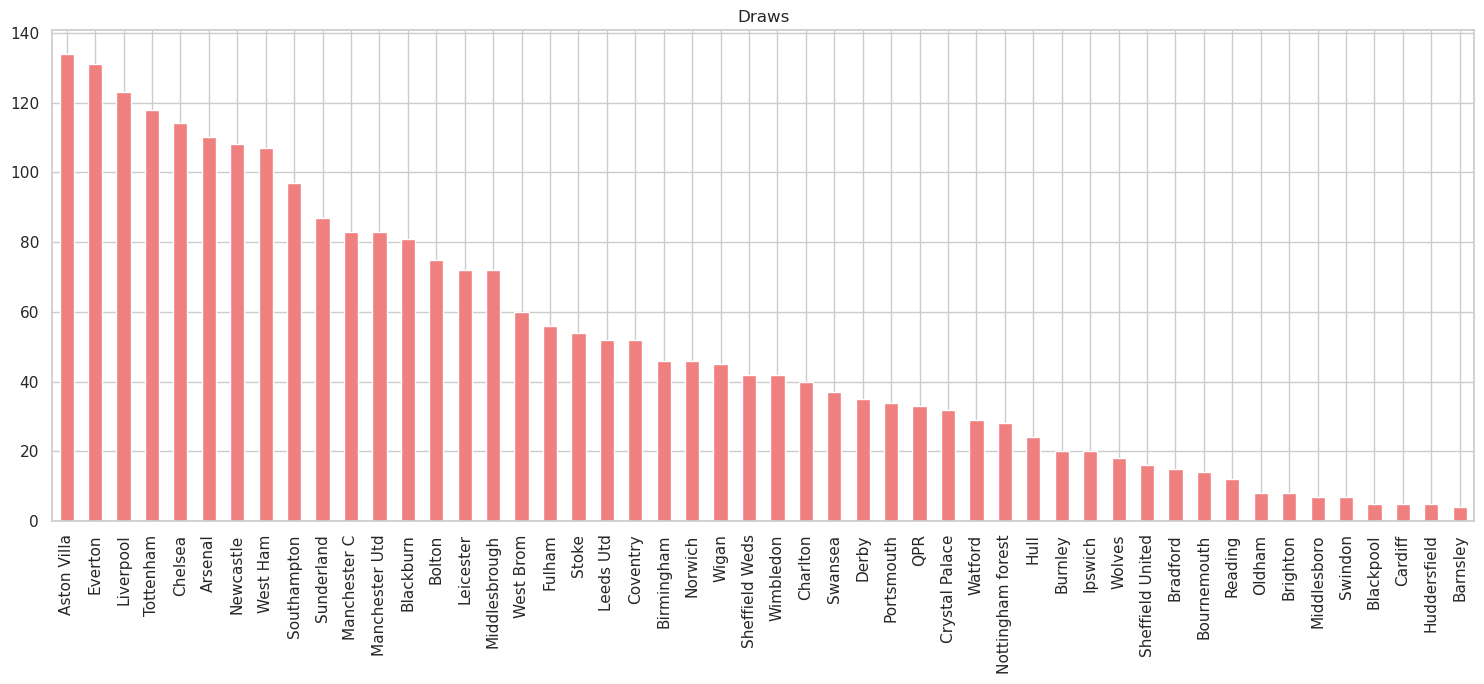

In [30]:
color = ['skyblue','darkorange','lightcoral']
Title = ['Home Team Wins','Away Team Wins','Draws']
dictt = {
    'H':'HomeTeam',
    'A':'AwayTeam',
    'D':'HomeTeam',
    
}

v = 0
for k in dictt.keys():
    winningTeam = clean_data[clean_data['FTR'] == k][dictt[k]].value_counts()
    figure, ax = plt.subplots(figsize=(15, 7))
    winningTeam.plot(kind='bar', ax=ax, color=color[v], title=Title[v])
    plt.tight_layout()
    plt.savefig("teamwisegoal"+str(v))
    plt.show()
    v = v+1



---
<a name = Section9></a>
# **9. Summarization**
---

<a name = Section91></a>
### Conclusion

The analysis of the football match dataset reveals several interesting insights into team performances and goal-scoring dynamics. The average number of goals scored per match by both the home and away teams provides a benchmark for assessing attacking capabilities. Additionally, the halftime results indicate a slight advantage for the home team, which may be attributed to the support of the home crowd or other factors.

The variation in the number of goals scored showcases the excitement and unpredictability of football matches. From goalless draws to high-scoring encounters, the sport's entertainment value is evident. Matches with a maximum of 9 goals scored by the home team and 8 goals by the away team stand out as thrilling contests.

Season-wise analysis enables the identification of trends over time. Teams' performances may vary across different seasons due to changes in player line-ups, tactics, and managerial approaches. Examining specific matches and teams within each season can uncover specific patterns and performances.

Coaches and analysts can leverage these insights to tailor training regimens and strategies for their teams. Understanding each team's strengths and weaknesses aids in devising game plans to optimize performance.

Moreover, fans gain a deeper appreciation for their favorite teams and the competitive nature of football. The data provides a glimpse into the ebb and flow of matches, fostering a sense of camaraderie and passion among supporters.

In conclusion, the football match dataset serves as a valuable resource for football enthusiasts, coaches, and analysts alike. It sheds light on the intricacies of the sport, the art of scoring goals, and the competitive spirit that captivates millions worldwide. By examining the data, stakeholders can make informed decisions, driving the sport's continued growth and excitement for generations to come.